# Урок 7. Многомерный статистический анализ. Линейная регрессия.

## 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

Используем матричный метод поиска коэффициентов:

### $$B=(X^T \cdot X)^{-1} \cdot X^T \cdot Y$$

In [3]:
x = zp.reshape(10, 1)
x

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [4]:
y = ks.reshape(10, 1)
y

array([[401.],
       [574.],
       [874.],
       [919.],
       [459.],
       [739.],
       [653.],
       [902.],
       [746.],
       [832.]])

In [5]:
b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)
print(f"Коэффициенты линейной регрессии без intercept:\n{b}\n")

Коэффициенты линейной регрессии без intercept:
[[5.88982042]]



In [6]:
#Добавим intercept
x = np.hstack([np.ones((10,1)), x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [7]:
b_intercept = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)
print(f"Коэффициенты линейной регрессии с intercept:\n{b_intercept}\n")

Коэффициенты линейной регрессии с intercept:
[[444.17735732]
 [  2.62053888]]



In [8]:
y_pred = b[0,0]*zp
y_pred_intercept = b_intercept[0,0] + b_intercept[1,0]*zp

print(f"Предсказанные значения без intercept:\n{y_pred}\n")
print(f"Предсказанные значения с intercept:\n{y_pred_intercept}\n")

Предсказанные значения без intercept:
[ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]

Предсказанные значения с intercept:
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]



In [9]:
df = pd.DataFrame({'zp': zp, 'ks': ks, 'y_pred': y_pred, 'y_pred_intercept': y_pred_intercept},\
                  columns=['zp', 'ks', 'y_pred', 'y_pred_intercept'])
df = df.sort_values('zp')
df

,zp,ks,y_pred,y_pred_intercept
0,35.0,401.0,206.143715,535.896218
4,40.0,459.0,235.592817,548.998913
1,45.0,574.0,265.041919,562.101607
6,54.0,653.0,318.050303,585.686457
5,70.0,739.0,412.287429,627.615079
9,110.0,832.0,647.880246,732.436634
8,120.0,746.0,706.778450,758.642023
7,150.0,902.0,883.473063,837.258190
2,190.0,874.0,1119.065880,942.079745
3,200.0,919.0,1177.964084,968.285134


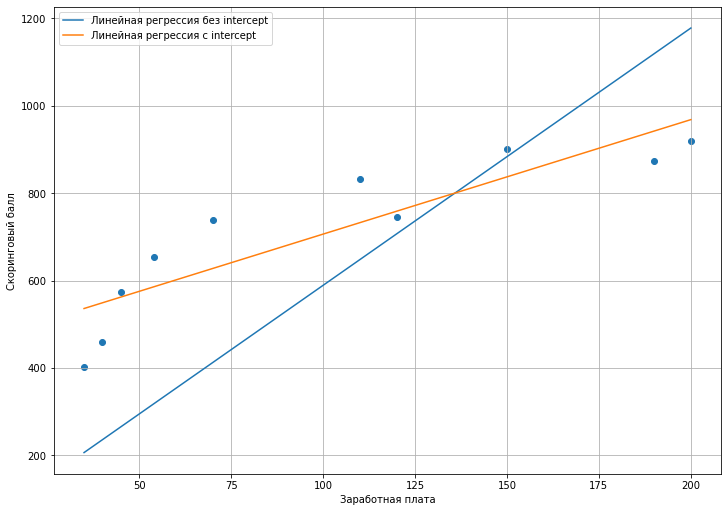

In [10]:
import matplotlib.pyplot as plt

fg = plt.figure(figsize=(10, 7), constrained_layout=True)

plt.scatter(df['zp'], df['ks'])
plt.plot(df['zp'], df['y_pred'], label='Линейная регрессия без intercept')
plt.plot(df['zp'], df['y_pred_intercept'], label='Линейная регрессия с intercept')
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.legend(loc='best')
plt.grid(True)

plt.show()

## 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [12]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n

In [13]:
alpha = 1e-6
B1 = 0.1
n = 10

In [14]:
for i in range(1, 101):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%10==0:
        print(f"Итерация {i}: B1={B1}, mse={mse_(B1)}")

Итерация 10: B1=1.5113380127259965, mse=320629.547533212
Итерация 20: B1=2.5786454957244893, mse=207561.83908263582
Итерация 30: B1=3.3857840075430166, mse=142898.87308113332
Итерация 40: B1=3.996172848283063, mse=105918.3838732957
Итерация 50: B1=4.457772104723629, mse=84769.3913878718
Итерация 60: B1=4.806851018565092, mse=72674.36796525786
Итерация 70: B1=5.0708377698185, mse=65757.27289822795
Итерация 80: B1=5.270474591391111, mse=61801.41415413721
Итерация 90: B1=5.421447548701978, mse=59539.074508439844
Итерация 100: B1=5.535619041013072, mse=58245.2515982716


In [15]:
for i in range(1, 2001):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%200==0:
        print(f"Итерация {i}: B1={B1}, mse={mse_(B1)}")

Итерация 200: B1=5.888494795528504, mse=56516.882625071215
Итерация 400: B1=5.889815458885515, mse=56516.858416058494
Итерация 600: B1=5.889820401564859, mse=56516.85841571943
Итерация 800: B1=5.889820420063197, mse=56516.8584157194
Итерация 1000: B1=5.88982042013243, mse=56516.85841571939
Итерация 1200: B1=5.889820420132673, mse=56516.85841571943
Итерация 1400: B1=5.889820420132673, mse=56516.85841571943
Итерация 1600: B1=5.889820420132673, mse=56516.85841571943
Итерация 1800: B1=5.889820420132673, mse=56516.85841571943
Итерация 2000: B1=5.889820420132673, mse=56516.85841571943


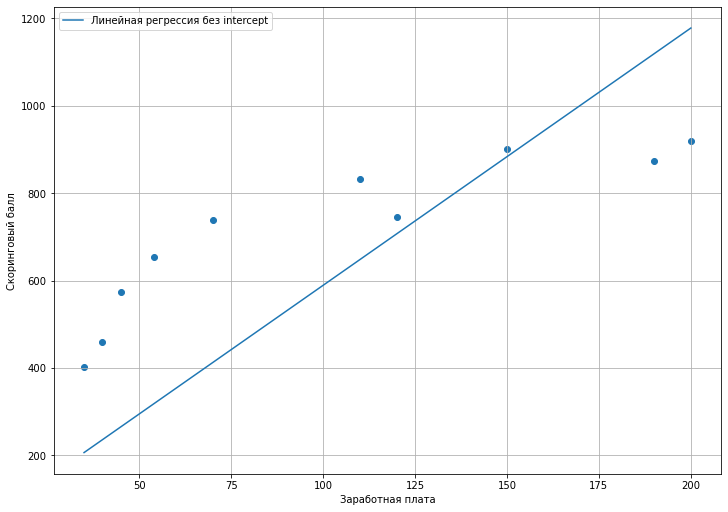

In [16]:
df = pd.DataFrame({'X': X, 'y': y, 'y_pred': B1*X}, columns=['X', 'y', 'y_pred'])
df = df.sort_values('X')

fg = plt.figure(figsize=(10, 7), constrained_layout=True)

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['y_pred'], label='Линейная регрессия без intercept')
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.legend(loc='best')
plt.grid(True)

plt.show()

## 3.  Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [17]:
def mse_(B0, B1, y=y, X=X, n=10):
    return np.sum((B0 + B1*X - y)**2)/n

In [18]:
alpha = 1e-6
beta = 1e-2
B0 = 0
B1 = 0.1
n = 10

In [19]:
for i in range(1, 101):
    delta_B0 = beta*(2/n)*np.sum(B0 + B1*X - y)
    delta_B1 = alpha*(2/n)*np.sum((B0 + B1*X - y)*X)
    B0 -= delta_B0
    B1 -= delta_B1
    if i%10==0:
        print(f"Итерация {i}: B0={B0}, B1={B1}, mse={mse_(B0, B1)}")

Итерация 10: B0=115.76991671828374, B1=1.4055192168362287, mse=215581.4408610072
Итерация 20: B0=190.7171504806154, B1=2.22249344339476, mse=93355.48168423213
Итерация 30: B0=239.69946215299103, B1=2.7296386840676368, mse=43921.44011545839
Итерация 40: B0=272.1521309339824, B1=3.040418629415014, mse=23843.668094910776
Итерация 50: B0=294.06740383856044, B1=3.2268655585547124, mse=15610.154169831285
Итерация 60: B0=309.25134279292445, B1=3.334705341551968, mse=12160.240517824892
Итерация 70: B0=320.1218573783844, B1=3.3929610054486217, mse=10646.848382111686
Итерация 80: B0=328.21541468198006, B1=3.42005048048252, mse=9921.668213853138
Итерация 90: B0=334.5087744746199, B1=3.427658336421014, mse=9521.292393853697
Итерация 100: B0=339.6232752149927, B1=3.4231941206303667, mse=9258.464858535659


In [20]:
for i in range(1, 10001):
    delta_B0 = beta*(2/n)*np.sum(B0 + B1*X - y)
    delta_B1 = alpha*(2/n)*np.sum((B0 + B1*X - y)*X)
    B0 -= delta_B0
    B1 -= delta_B1
    if i%500==0:
        print(f"Итерация {i}: B0={B0}, B1={B1}, mse={mse_(B0, B1)}")

Итерация 500: B0=423.2376133309916, B1=2.7945416266880545, mse=6587.083990126589
Итерация 1000: B0=439.8489907467095, B1=2.656506259227507, mse=6475.399184922162
Итерация 1500: B0=443.2826588391799, B1=2.627973547878455, mse=6470.627196015911
Итерация 2000: B0=443.99241795635015, B1=2.622075670893203, mse=6470.423301868632
Итерация 2500: B0=444.1391292839569, B1=2.620856545500326, mse=6470.414590024547
Итерация 3000: B0=444.1694553666058, B1=2.620604545208141, mse=6470.414217791076
Итерация 3500: B0=444.17572394384405, B1=2.6205524552856185, mse=6470.414201886549
Итерация 4000: B0=444.17701969513024, B1=2.620541687996401, mse=6470.414201206988
Итерация 4500: B0=444.1772875344387, B1=2.6205394623352487, mse=6470.414201177955
Итерация 5000: B0=444.1773428983783, B1=2.6205390022781727, mse=6470.414201176717
Итерация 5500: B0=444.17735434242553, B1=2.620538907181707, mse=6470.4142011766635
Итерация 6000: B0=444.1773567079766, B1=2.6205388875247153, mse=6470.414201176658
Итерация 6500: B0=4

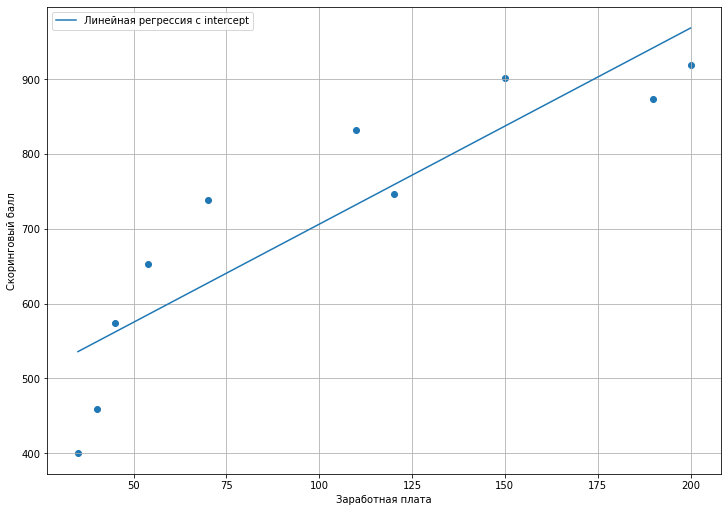

In [21]:
df = pd.DataFrame({'X': X, 'y': y, 'y_pred': B0 + B1*X}, columns=['X', 'y', 'y_pred'])
df = df.sort_values('X')

fg = plt.figure(figsize=(10, 7), constrained_layout=True)

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['y_pred'], label='Линейная регрессия c intercept')
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.legend(loc='best')
plt.grid(True)

plt.show()